# Project: Wrangling and Analyze Data

# Table of Contents
1. Data Gathering
2. Assessing Data
3. Visual Assessment
4. Programmatic Assessment
5. Quality Issues
6. Tidiness Issues
7. Cleaning Data
8. Storing  Data

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import re
import requests
import json
import tweepy
import string
from IPython.display import Image
from functools import reduce
import datetime as dt
from tweepy import OAuthHandler
from timeit import default_timer as timer
import requests
import os.path
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]

if not os.path.exists(filename):
    r = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(r.content)

In [4]:
image_predictions = pd.read_csv("image-predictions.tsv", sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
lines = []

with open('tweet_json.txt', 'r') as tweets:
    
    for line in tweets:
        line_dict = json.loads(line.strip())
        
        data = {
            "id": line_dict["id"],
            "retweet_count": line_dict["retweet_count"],
            "favorite_count": line_dict["favorite_count"]
        }
        
        lines.append(data)

tweet_json = pd.DataFrame(lines, columns = ["id", "retweet_count", "favorite_count"])

## Assessing Data




# visual assesment

In [7]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


# pragmmatic assesment

In [10]:
# View the dataframe info
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# View the dataframe info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
# View the dataframe info
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [13]:
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [19]:
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
508,812503143955202048,NaN,NaN,2016-12-24 03:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm happy to inform you all that Jake is in ex...,NaN,NaN,NaN,https://m.facebook.com/story.php?story_fbid=18...,13,10,None,None,None,None,None
917,756939218950160384,NaN,NaN,2016-07-23 19:49:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He is a majestic mountain pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756939218...,12,10,Jax,None,None,pupper,None
770,776819012571455488,NaN,NaN,2016-09-16 16:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody look at this beautifu...,6.798284e+17,4.196984e+09,2015-12-24 00:58:27 +0000,https://twitter.com/dog_rates/status/679828447...,13,10,None,None,None,pupper,None
2240,667924896115245057,NaN,NaN,2015-11-21 04:37:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,None,None,None,None
1638,684188786104872960,NaN,NaN,2016-01-05 01:44:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yo Boomer I'm taking a selfie, grab your stic...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684188786...,10,10,None,None,None,None,None


In [20]:
# Identify Replies
# Rows where the in_reply_to_status_id is not null
twitter_archive_enhanced[~twitter_archive_enhanced.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [21]:
# View the rows where the retweeted_status_id is not null
# These rows do not contain original ratings from WeRateDogs

retweeted = twitter_archive_enhanced[~twitter_archive_enhanced.retweeted_status_id.isnull()]

print('{} records were retweets'.format(retweeted.shape[0]))

retweeted[['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name']].head()

181 records were retweets


,tweet_id,text,rating_numerator,rating_denominator,name
19,888202515573088257,RT @dog_rates: This is Canela. She attempted s...,13,10,Canela
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,12,10,None
36,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,13,10,Lilly
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,14,10,Emmy
73,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,13,10,Shadow


In [22]:
# Describe the ratings
twitter_archive_enhanced[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


# we see very high ratings

In [23]:
twitter_archive_enhanced.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


# apparently group of dogs were rated together

In [24]:
twitter_archive_enhanced.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
Buddy             7
an                7
Toby              7
Daisy             7
Bailey            7
Leo               6
Oscar             6
Jax               6
Scout             6
Jack              6
Bella             6
Dave              6
Milo              6
Rusty             6
Koda              6
Stanley           6
Sunny             5
               ... 
Antony            1
Stefan            1
Leonidas          1
Stuart            1
Edgar             1
Tove              1
Sobe              1
Miguel            1
Grady             1
Alexanderson      1
Suki              1
Dook              1
Bookstore         1
Jangle            1
Strudel           1
Godi              1
William           1
Creg              1
Odin              1


In [25]:
pd.set_option('max_rows', None)
pd.set_option('max_colwidth', 200)

# View the tweets (id, text) with No dog names
twitter_archive_enhanced[twitter_archive_enhanced.name == 'None'][['tweet_id', 'text']]

,tweet_id,text
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12,889665388333682689,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24,887343217045368832,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25,887101392804085760,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
35,885518971528720385,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
37,885167619883638784,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf
41,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC"


# Apparently, the records above contained retweets, actual dogs with no names or invalid tweets (tweets with other items such as mechanics, penguin etc

In [26]:
# View the dog names
twitter_archive_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [27]:
# Let's view the rows of tweets whose dog names are either english articles
# or unexpected as a dog name
# a, an, O, his, this, unacceptable, all, the, by, such, not, one, mad
pd.set_option('max_colwidth', 150)

articles = ['a', 'an', 'the', 'O', 'his', 'this', 'unacceptable', 'all',
            'by', 'such', 'not', 'one', 'mad']

twitter_archive_enhanced.query('name in @articles')[['text', 'name']]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/g...,a
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
682,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,mad
759,RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,an
775,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
924,This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k,one


In [28]:
# some tweets without dog names were not associated with dogs (I know there's a polar bear in there! somewhere)

# Some keywords appeared in records where something other than dogs or dog with no pictures appeared
pls_filt = twitter_archive_enhanced.text.str.contains('please (don\'t|only|stop)', case=False)
we_only_filt = twitter_archive_enhanced.text.str.contains('we only rate dogs', case=False, regex=False)

# filter for dogs with no name
no_name_filt = twitter_archive_enhanced.name == 'None'

# Let's look at dogs with no names
twitter_archive_enhanced[pls_filt | we_only_filt][['tweet_id', 'text', 'name']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,tweet_id,text,name
25,887101392804085760,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad...,None
47,883117836046086144,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",None
59,880872448815771648,Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://...,None
62,880095782870896641,Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/Hau...,None
89,875021211251597312,Guys please stop sending pictures without any dogs in th- oh never mind hello excuse me sir. 12/10 stealthy as h*ck https://t.co/brCQoqc8AW,None
93,874057562936811520,"I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY...",None
118,869988702071779329,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
127,867900495410671616,"Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDN...",None
131,867051520902168576,"Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t.co/...",None
141,864873206498414592,We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,None


# Sammy (680055455951884288) is a false positive

In [29]:
twitter_archive_enhanced.duplicated().sum()

0

In [30]:
image_predictions.duplicated().sum()

0

In [31]:
tweet_json.duplicated().sum()

0

### Quality issues
# Twitter_archived_enhanced

1. 181 records do not contain original tweets from WeRateDogs.

2. A retweet involving a dog named Canela re-added (duplicated) as an original tweet

3. Tweets of dogs with no images/tweets of other animals/items e.g Mechanic, Penguin, Black bears etc.

4. The timestamp columns is a strings and not a datetime

5. Irrelevant columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id) - contains a lot of NaNs

6. Dog name 'O' instead of O'Malley, 'his' instead of Quizno

7. Valid dog names in text column replaced (e.g. with 'a') in name column.

8. Illegal dog names (an, this, unacceptable, all, the, by, such, such, not, one)

9. Potential Typographical error in dog names (Jessiga, Fwed, Sampson)

# image_predictions
Note that this dataset contained predictions of other animals/stuffs e.g. Mechanics and black bears. In this project, I won't drop the rows where no dog was predicted

### Tidiness issues
1. One Variable (Dog Stage) in 4 columns

2. The extra_tweets and image_predictions dataset should be part of twitter_archive_enhanced

## Cleaning Data


In [32]:
# Make copies of original pieces of data
tae_clean = twitter_archive_enhanced.copy()
img_pred_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1:
twitter_archived_enhanced: 181 records do not contain original tweets from WeRateDogs.

#### Define:
Remove the rows containing the retweets using pandas drop method

#### Code

In [33]:
# get the indices of the rows
indices = (tae_clean[~tae_clean.retweeted_status_id.isnull()]).index

tae_clean = tae_clean.drop(index=indices)

#### Test

In [34]:
# check if we still have retweets
tae_clean[~tae_clean.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:
twitter_archived_enhanced: A retweet involving a dog named Canela re-added (duplicated) as an original tweet

#### Define
Remove the tweet with dog name Canela

#### Code

In [35]:
# Just to be sure it's just one
is_canela = tae_clean.name == 'Canela'

print('Number of dogs named Canela:', is_canela.sum())

Number of dogs named Canela: 1


In [36]:
tae_clean.drop(index = tae_clean[is_canela].index, inplace = True)

#### Test

In [37]:
tae_clean[is_canela]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# issue 3:
Tweets with no dog image(s)/tweets with pictures of other animals/items e.g. Mechanics, Penguins etc.

# Define:
Remove any tweet from twitter_archived_enhanced dataset that has no image or whose image does not match any dog

# Code:

In [38]:
pls_filt = tae_clean.text.str.contains('please (don\'t|only|stop)', case=False)
we_only_filt = tae_clean.text.str.contains('we only rate dogs', case=False, regex=False)

# filter for dogs with no name
no_name_filt = tae_clean.name == 'None'

indices = list(tae_clean[pls_filt | we_only_filt].index)

# Derived from manual inspection
others = [872486979161796608, 870804317367881728, 845812042753855489,
          841320156043304961, 771014301343748096, 747933425676525569, 
          747512671126323200,747103485104099331, 727286334147182592,
          675153376133427200, 667793409583771648, 747594051852075008]

indices = indices + list(tae_clean.query('tweet_id in @others').index)

# find and remove Sammy from the indices list
Sammy = list(tae_clean.query('tweet_id == 680055455951884288').index)[0]
indices.pop(indices.index(Sammy))

tae_clean = tae_clean.drop(index = indices)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


# Test:

In [39]:
tae_clean[pls_filt | we_only_filt][['tweet_id', 'text', 'name']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,text,name
1726,680055455951884288,"Meet Sammy. At first I was like ""that's a snowflake. we only rate dogs,"" but he would've melted by now, so 10/10 https://t.co/MQfPK4zwuh",Sammy


In [40]:
tae_clean[no_name_filt][['tweet_id', 'text', 'name']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,text,name
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,None
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None
12,889665388333682689,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,None
24,887343217045368832,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,None
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,None
35,885518971528720385,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,None
37,885167619883638784,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.c...,None
41,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t...",None
42,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,None
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,None


# issue #4: 
The timestamp column is a string instead of datetime

# Define:
Change the columns to datetime using pandas to_datetime method

# Code

In [41]:
tae_clean['timestamp'] = pd.to_datetime(tae_clean.timestamp)

# Test

In [42]:
tae_clean[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2095 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 32.7 KB


# issue #5:
Irrelevant columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id)- contains a lot of NaNs


# Define: 
Drop the columns using pandas drop method

# code

In [43]:
cols_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

tae_clean.drop(cols_to_drop, axis = 1, inplace = True)

# Test

In [44]:
list(tae_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

# issue #6:
dog name 'O' instead of O'Malley, 'his' instead of Quizno

# Define:
Replace 'O' with O'Malley and 'his' with Quizno


# Code

In [45]:
tae_clean.name = tae_clean.name.replace({'O': "O'Malley", 'his': 'Quizno' }, value=None)

# Test

In [46]:
tae_clean[(tae_clean.name == "O'Malley") | (tae_clean.name == "Quizno")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,None,None,None,None
992,748692773788876800,2016-07-01 01:40:41,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7,https://twitter.com/dog_rates/status/748692773788876800/photo/1,10,10,Quizno,doggo,None,None,None


# issue #7:
Valid dog names in text column replaced (e.g. with 'a') in name column.

# Define:
Extract the dog name from the text column if it's present else replace the dog name column with None.

# code

In [47]:
tae_clean[tae_clean.name == 'a'][['tweet_id', 'text', 'name']]

reg = '(name(d|\sis) \w+)' 

result = tae_clean[(tae_clean.name == 'a') | (tae_clean.name == 'None')].text.str.extractall(reg)[0]

# get the row indices and the values
indices = result.index.levels[0]
values = [name.split(' ')[-1] for name in result]

# replace the names
# tae_clean.name.loc[indices] = values
tae_clean.loc[indices,'name'] = values
tae_clean.name = tae_clean.name.replace({'a': 'None'}, value=None)

# Test

In [48]:
(tae_clean.name == 'a').sum()

0

In [49]:
tae_clean.name.loc[indices]

35          Howard
168           Zoey
843        Charley
1678          Thea
1734    Sabertooth
1853         Wylie
1955           Kip
2034         Jacob
2066         Rufus
2116         Spork
2125      Cherokee
2128         Hemry
2146       Alphred
2161       Alfredo
2166          Zeus
2191         Leroi
2218          Chuk
2227          Guss
2235       Alfonso
2249        Cheryl
2255       Jessiga
2264         Klint
2267           Big
2269       Tickles
2273          Kohl
2287         Daryl
2304          Pepe
2311     Octaviath
2314          Johm
Name: name, dtype: object

# issue #8:
Illegal dog names (an, this, unacceptable, all, the, by, such, such, not, one)

# Define:
Initially we drop some records without dog images and others which weren't dogs. Change the illegal dog names (if present) to None. Drop a row with 'not' as dog name.

# Code

In [50]:
# Reviewer suggestion: life saver
# All illegal dog names were lowercased. We consider 'None' as an illegal name as well
mask = (tae_clean.name.str.islower()) | (tae_clean.name == 'None')
column_name = 'name' 
tae_clean.loc[mask, column_name] = np.nan

In [51]:
# Oops! a tweet_id with no dog picture (jokestar huh?)
tae_clean.drop(index = tae_clean[tae_clean.tweet_id == 748977405889503236].index, inplace=True)

# Test

In [52]:
# We no longer have illegal dog names
tae_clean.loc[mask, column_name].any()

False

In [53]:
tae_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Maya', 'Mingus', 'Derek',
       'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Howard', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


# issue #9:
Potential Typographical error in dog names (Jessiga, Fwed, Sampson)

# Define:
Replace (Jessiga, Fwed, Sampson, Johm, Hemry) with (Jessica, Fred, Samson, John, Henry). I may be wrong about this but I assume these names were not correctly spelt

# Code

In [54]:
names = { 'Jessiga': 'Jessica', 'Sampson': 'Samson', 'Johm': 'John', 'Hemry': 'Henry', 'Fwed': 'Fred' }

tae_clean.name = tae_clean.name.replace(names, value=None)

# Test

In [55]:
# These names are no longer present
names = ('Jessiga', 'Fwed', 'Sampson', 'Johm', 'Hemry')

tae_clean.query('name in @names')


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# Tideness:

# issues #1:
One Variable (Dog Stage) in 4 columns

# Define:
Combine the dog stage(s) into a single column and replace all 'None' with nan. Then, drop the doggo, floofer, pupper and puppo columns

# Code

In [56]:
# utility function
def dog_stage(df):
    """
     Determine the appropriate stage(s) of a dog
     Args:
        df (pandas.core.DataFrame) - pandas dataframe containing dog stages in different columns
     Returns:
        nan, a dog stage or a comma seperated list of dog stages
    """
    def no_dog_stage(df):
        return df.doggo == 'None' and df.floofer == 'None' and df.pupper == 'None' and df.puppo == 'None'
    
    def is_none(val):
        return '' if val == 'None' else val
    
    if no_dog_stage(df):
        return np.nan
    else:
        # add the rows together seperated by comma
        dog_stage = '{} {} {} {}'.format(is_none(df.doggo), is_none(df.floofer), is_none(df.pupper), is_none(df.puppo))
        return dog_stage.strip()


# dog wrongly classified as doggo and floofer instead of floofer only
# 854010172552949760 (change doggo to None)
tae_clean.loc[tae_clean.tweet_id == 854010172552949760, 'doggo'] = 'None'

tae_clean['dog_stage'] = tae_clean.apply(dog_stage, axis=1)

tae_clean = tae_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

# Test

In [57]:
tae_clean[['tweet_id', 'text', 'name', 'dog_stage']] .head(30)

,tweet_id,text,name,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",Tilly,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",Franklin,NaN
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,NaN,NaN
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,Jax,NaN
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN
8,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey,NaN
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co...,Cassie,doggo


# issue #2:
The extra_tweets and image_predictions datasets should be part of twitter_archive_enhanced dataset

# Define:
Merge the image_predictions to the twitter_archive_enhanced table, joining on tweet_id column. Then merge the extra_tweets to the combination and then drop the redundant id column

# Code:

In [59]:
# merge the datasets
tae_clean = tae_clean.merge(image_predictions, on='tweet_id', how='left') \
     .merge(tweet_json_clean, left_on='tweet_id', right_on='id', how='left') \
     .drop('id', axis=1)

# Test

In [60]:
print(list(tae_clean))

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count']


In [61]:
tae_clean.duplicated().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
# The image_predictions dataset was not modified, so I left it as is.

# save the twitter archive enhanced dataset
tae_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data


In [63]:
tae_clean.loc[:, 'rating_numerator': 'favorite_count'].describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2094.00000,2094.000000,1915.000000,1915.000000,1.915000e+03,1.915000e+03,2094.000000,2094.000000
mean,13.32999,10.511939,1.206266,0.594169,1.344504e-01,6.053006e-02,2687.651385,8463.776982
std,48.63494,7.152933,0.567090,0.272225,1.007135e-01,5.117754e-02,4615.512215,11797.592466
min,0.00000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,52.000000
25%,10.00000,10.000000,1.000000,0.362880,5.370120e-02,1.619495e-02,591.250000,1834.250000
50%,11.00000,10.000000,1.000000,0.587764,1.180890e-01,4.953060e-02,1311.000000,3897.500000
75%,12.00000,10.000000,1.000000,0.848609,1.955655e-01,9.272610e-02,3121.250000,10810.000000
max,1776.00000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [64]:
# Which tweet had the most retweets
tae_clean[tae_clean.retweet_count == tae_clean.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
815,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075


In [65]:
# Which tweet was the most favorite
tae_clean[tae_clean.favorite_count == tae_clean.favorite_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
324,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13,10,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265,132810


In [66]:
# Most common names (Top 10)
tae_clean.name.value_counts()[:11]

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Sadie       8
Winston     8
Lola        8
Daisy       7
Toby        7
Name: name, dtype: int64

### Insights:
1. The average rating numerator was 13.3.

2. The most popular dog name found in the dataset were Lucy and Charlie.

3. The higher the rating, the higher the favorite counts

### Visualization

Text(0,0.5,'Favorite count')

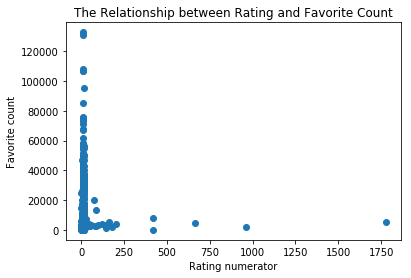

In [67]:
# Does the rating affect the favorite count?
plt.scatter(tae_clean.rating_numerator, tae_clean.favorite_count)
plt.title('The Relationship between Rating and Favorite Count')
plt.xlabel('Rating numerator')
plt.ylabel('Favorite count')

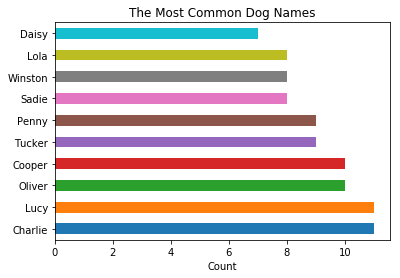

In [68]:
# Bonus, let's see popular dog names (without None of course)
tae_clean.name.value_counts()[:10].plot.barh();
plt.xlabel('Count');
plt.title('The Most Common Dog Names');